In [2]:
from math import sin, cos
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy

%matplotlib inline

(5, 16)


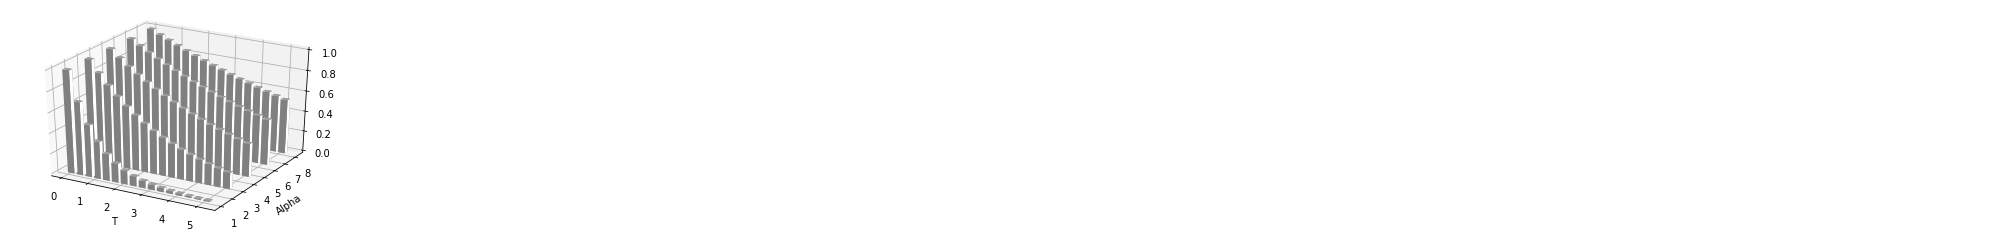

In [3]:
# Data generation
t = np.linspace(0, 5, 16)
alpha = np.linspace(1, 8, 5)
T, A = np.meshgrid(t, alpha)
data = np.exp(-T * (1. / A))
print(data.shape)

# Plotting
fig = plt.figure()
ax = fig.gca(projection = '3d')

Xi = T.flatten()
Yi = A.flatten()
Zi = np.zeros(data.size)

dx = .25 * np.ones(data.size)
dy = .25 * np.ones(data.size)
dz = data.flatten()

ax.set_xlabel('T')
ax.set_ylabel('Alpha')
ax.bar3d(Xi, Yi, Zi, dx, dy, dz, color = 'w')

(1, 4) (1, 4)
-80


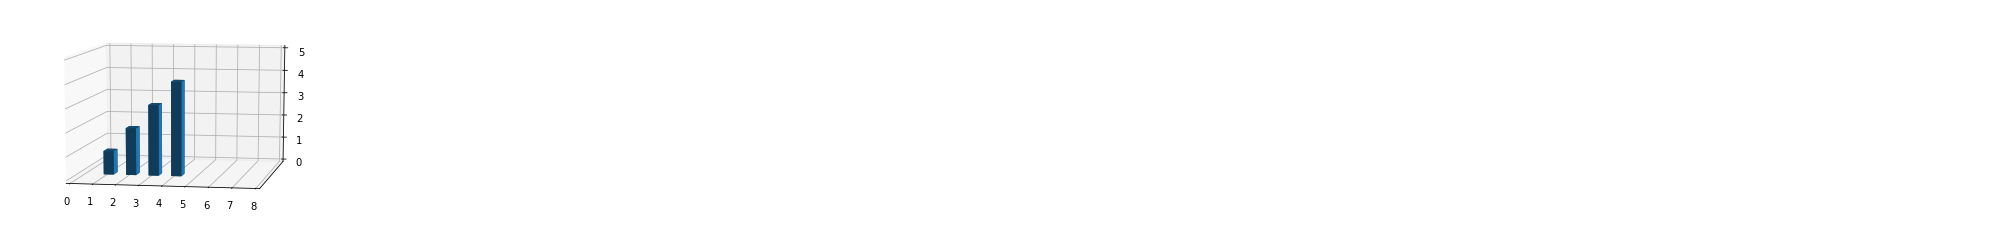

In [4]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
# 控制视角, 其中 elev 控制 z 方向的视角, 而 azim 控制 xy 平面的视角
ax.view_init(elev=10, azim=-80) 
x = np.array([1, 2, 3, 4])
y = np.array([1])
# 若 x \in R^m, y\in R^n, 那么 xx 和 yy 的结果都是 R^{n \times m}
xx, yy = np.meshgrid(x, y)
print(xx.shape, yy.shape)
data = xx * yy
z = np.zeros(data.size)
# bar 的宽度
dx = 0.45 * np.ones(data.size)
dy = 0.4 * np.ones(data.size)
dz = [1, 2, 3, 4]
ax.set_xlim(0, 8)
ax.set_ylim(0, 4)
ax.yaxis.set_visible(False)
ax.get_yaxis().set_ticks([])
ax.set_zlim(0, 5)

## xx.flatten(), yy.flatten(), z 在 xx 和 yy 围成的区域中进行描点, z 是在 z 轴方向描点,
## 但是 bar 是宽度的, 因此用 dx, dy, dz 来设置它们的宽度. 比如 dx[0] 表示第一个点的在 x 方向的
## 宽度是 0.45.
ax.bar3d(xx.flatten(), yy.flatten(), z, dx, dy, dz, cmap=cm.coolwarm)
print(ax.azim)

In [30]:
def plot_cylinder_element(x, z, dz, rx = 5, ry = 5, color = "b"):
    """
    x: left, right
    z: start height
    dz: height of cylinder
    rx, ry = radius of width (x) and depth (y)
    color = color

    Inspired by:
http://matplotlib.1069221.n5.nabble.com/plot-surface-shading-and-clipping-error-td14031.html
    """

    N = 50             # number of elements
    # a lower stride will give more faces. A cylinder with 4 faces is a cube :)
    # I think with N=100 and rstride=2, it will have 50 faces
    # cstride is the height, rstride the circle
    cstride_side = 1000 # only 1 element needed
    rstride_side = 1    # many elements to make a nice cylinder shape
    cstride_top = 10    
    rstride_top = 10

    # parameters of cylinder
    phi = numpy.linspace(0, 2 * numpy.pi, N) 
    _r = numpy.ones(N) 
    _h = numpy.linspace(0, 1, N) 

    # cylinder
    _x = rx * numpy.outer(numpy.cos(phi), _r) + x
    _y = ry * numpy.outer(numpy.sin(phi), _r) 
    _z = dz * numpy.outer(numpy.ones(numpy.size(_r)), _h) + z
    ax.plot_surface(_x, _y, _z, rstride = rstride_side, cstride = cstride_side, linewidth = 0, alpha = 1, color = color) 

    # to cover the gaps between the faces, plot the cylinder again at a slightly smaller radius
    _x *= 0.99
    _y *= 0.99
    ax.plot_surface(_x, _y, _z, rstride = rstride_side + 1, cstride = cstride_side + 1, linewidth=0, alpha=1, color = color) 

    # top
    _x = rx * numpy.outer(numpy.cos(phi), _h) + x
    _y = ry * numpy.outer(numpy.sin(phi), _h) 
    _z = numpy.zeros([N,N]) + z + dz + 0.1
    ax.plot_surface(_x, _y, _z,  rstride = rstride_top, cstride = cstride_top, linewidth = 0, alpha = 1, color = color) 

    # plot again with different stride to mask the gaps    
    ax.plot_surface(_x, _y, _z, rstride = rstride_side + 1, cstride = cstride_side + 1, linewidth=0, alpha=1, color = color) 


def plot_cylinder(x, z, rx = 5, ry = 5):
    """
    x: left-right for each cylinder
    z: list height difference (ie. not cumulative) 
    """
    # list with colors
    colors = ["b", "g", "r", "c", "y", "k"]
    # plot cylinder elements
    _z = 0
    for i in range(len(z)):
        plot_cylinder_element(x, _z, z[i], rx = rx, ry = ry, color = colors[i % len(colors)])  
        _z += z[i]


def cylinder_plot(z, r = 10, dr = 30):
    """
    z: list of different cylinders with for each a list height difference (ie. not cumulative)
    r: radius
    dr: distance between cylinders    
    """
    # different cylinders next to each other
    x = numpy.arange(len(z)) * dr
    # possible difference between width (x) and depth (y)
    rx = r
    ry = r
    # make cylinders
    for i in range(len(z)):
        plot_cylinder(x[i], z[i], rx = rx, ry = ry)

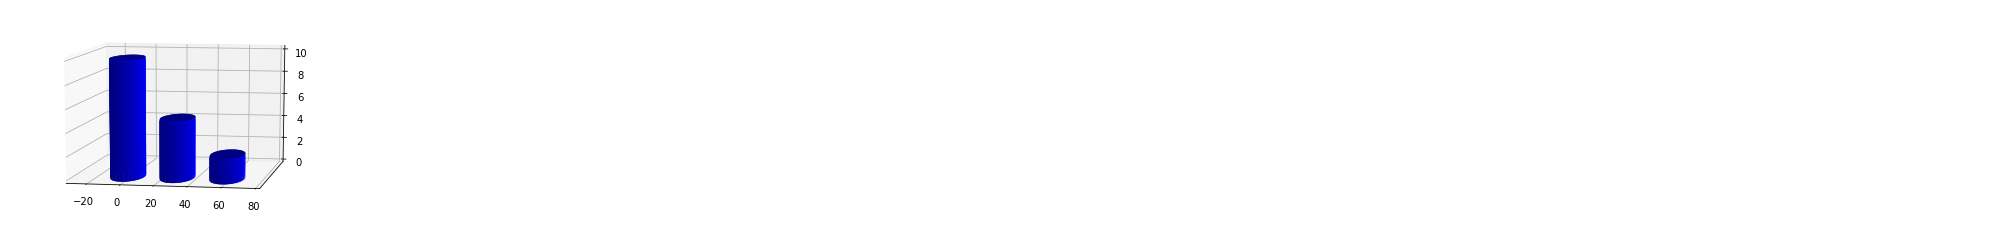

In [31]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
# 控制视角, 其中 elev 控制 z 方向的视角, 而 azim 控制 xy 平面的视角
ax.view_init(elev=10, azim=-80)
ax.set_xlim(-30, 80)
ax.set_ylim(-10, 40)
ax.yaxis.set_visible(False)
ax.get_yaxis().set_ticks([])
cylinder_plot([[10], [5], [2]]) 

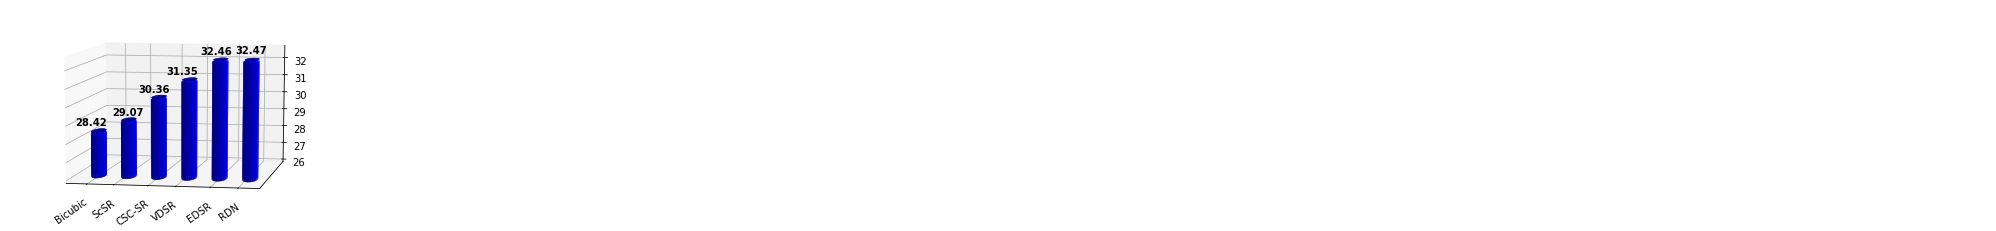

In [121]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
# 控制视角, 其中 elev 控制 z 方向的视角, 而 azim 控制 xy 平面的视角
ax.view_init(elev=10, azim=-80)
ax.set_xlim(-30, 240)
ax.set_ylim(-20, 80)
# ax.set_zlim(26, 34)
ax.yaxis.set_visible(False)
ax.get_yaxis().set_ticks([])
ax.zaxis.set_ticklabels([26, 27, 28, 29, 30, 31, 32])
# print(ax.get_zticks())
r = 10
dr = 45 # distance between cylinders 
labels = ['Bicubic', 'ScSR', 'CSC-SR', 'VDSR', 'EDSR', 'RDN']
# ScSR 的结果来自 https://github.com/jbhuang0604/SelfExSR
plt.xticks([-5, 35, 85, 125, 175, 215], labels, rotation=35,
           horizontalalignment='right', rotation_mode='anchor' )
# cylinder_plot([[28.42], [29.07], [30.36], [31.35], [32.46], [32.47]], r, dr) 
# zmin=26
ax.text(-35, 0, 2.8, '28.42', fontsize=10, fontweight='bold')
ax.text(20, 0, 3.4, '29.07', fontsize=10, fontweight='bold')
ax.text(60, 0, 4.7, '30.36', fontsize=10, fontweight='bold')
ax.text(100, 0, 5.7, '31.35', fontsize=10, fontweight='bold')
ax.text(150, 0, 6.8, '32.46', fontsize=10, fontweight='bold')
ax.text(200, 0, 6.9, '32.47', fontsize=10, fontweight='bold')
cylinder_plot([[2.42], [3.07], [4.36], [5.35], [6.46], [6.47]], r, dr) 

In [84]:
[item for item in dir(ax) if 'z' in item]
# ax.get_yaxis()

['__sizeof__',
 '_rasterization_zorder',
 '_rasterized',
 '_shared_z_axes',
 '_sharez',
 '_zcid',
 '_zmargin',
 '_zoom_btn',
 'auto_scale_xyz',
 'azim',
 'can_zoom',
 'convert_zunits',
 'fmt_zdata',
 'format_zdata',
 'get_autoscalez_on',
 'get_rasterization_zorder',
 'get_rasterized',
 'get_zbound',
 'get_zlabel',
 'get_zlim',
 'get_zlim3d',
 'get_zmajorticklabels',
 'get_zminorticklabels',
 'get_zorder',
 'get_zscale',
 'get_zticklabels',
 'get_zticklines',
 'get_zticks',
 'indicate_inset_zoom',
 'initial_azim',
 'invert_zaxis',
 'set_autoscalez_on',
 'set_rasterization_zorder',
 'set_rasterized',
 'set_zbound',
 'set_zlabel',
 'set_zlim',
 'set_zlim3d',
 'set_zmargin',
 'set_zorder',
 'set_zscale',
 'set_zticklabels',
 'set_zticks',
 'w_zaxis',
 'zaxis',
 'zaxis_date',
 'zaxis_inverted',
 'zorder',
 'zz_dataLim',
 'zz_viewLim']